<a href="https://colab.research.google.com/github/deamonknoppix/Python_Projects/blob/main/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 13.3 MB/s 
     |████████████████████████████████| 1.6 MB 20.5 MB/s 


In [37]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv('Montreal_Weather.csv')
df.tail()

,date,max_temperature_v,max_temperature_s,max_temperature_c,max_temperature_d,min_temperature_v,min_temperature_s,min_temperature_c,min_temperature_d
0,2021-12-25,-2.38,6.15,450,1991-12-18 2021-01-01,-10.05,6.76,450,1991-12-18 2021-01-01
1,2020-12-25,-2.47,6.11,450,1990-12-18 2020-01-01,-10.20,6.79,450,1990-12-18 2020-01-01
2,2019-12-25,-2.77,6.33,450,1989-12-18 2019-01-01,-10.63,7.01,450,1989-12-18 2019-01-01
3,2018-12-25,-2.78,6.37,450,1988-12-18 2018-01-01,-10.70,7.05,450,1988-12-18 2018-01-01
4,2017-12-25,-2.46,6.14,450,1987-12-18 2017-01-01,-10.42,6.93,450,1987-12-18 2017-01-01


In [45]:
df.date.unique()

array(['2021-12-25T00:00:00.000000000', '2020-12-25T00:00:00.000000000',
       '2019-12-25T00:00:00.000000000', '2018-12-25T00:00:00.000000000',
       '2017-12-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [46]:
df.columns

Index(['date', 'max_temperature_v', 'max_temperature_s', 'max_temperature_c',
       'max_temperature_d', 'min_temperature_v', 'min_temperature_s',
       'min_temperature_c', 'min_temperature_d'],
      dtype='object')

In [14]:
df.dtypes

date                  object
max_temperature_v    float64
max_temperature_s    float64
max_temperature_c      int64
max_temperature_d     object
min_temperature_v    float64
min_temperature_s    float64
min_temperature_c      int64
min_temperature_d     object
dtype: object

In [47]:
df ['date'] = pd.to_datetime(df ['date'])
df.tail()

,date,max_temperature_v,max_temperature_s,max_temperature_c,max_temperature_d,min_temperature_v,min_temperature_s,min_temperature_c,min_temperature_d
0,2021-12-25,-2.38,6.15,450,1991-12-18 2021-01-01,-10.05,6.76,450,1991-12-18 2021-01-01
1,2020-12-25,-2.47,6.11,450,1990-12-18 2020-01-01,-10.20,6.79,450,1990-12-18 2020-01-01
2,2019-12-25,-2.77,6.33,450,1989-12-18 2019-01-01,-10.63,7.01,450,1989-12-18 2019-01-01
3,2018-12-25,-2.78,6.37,450,1988-12-18 2018-01-01,-10.70,7.05,450,1988-12-18 2018-01-01
4,2017-12-25,-2.46,6.14,450,1987-12-18 2017-01-01,-10.42,6.93,450,1987-12-18 2017-01-01


In [48]:
df.dtypes

date                 datetime64[ns]
max_temperature_v           float64
max_temperature_s           float64
max_temperature_c             int64
max_temperature_d            object
min_temperature_v           float64
min_temperature_s           float64
min_temperature_c             int64
min_temperature_d            object
dtype: object

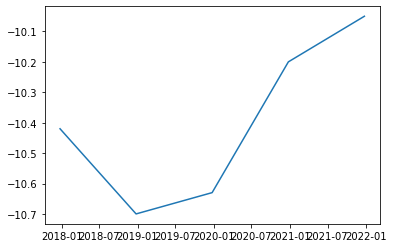

In [49]:
plt.plot(df ['date'], df ['min_temperature_v'])
plt.show()

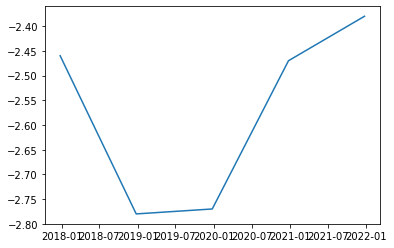

In [50]:
plt.plot(df ['date'], df ['max_temperature_v'])
plt.show()

Training the forecasting model

In [51]:
new_column = df[['date', 'min_temperature_v']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
0,2021-12-25,-10.05
1,2020-12-25,-10.20
2,2019-12-25,-10.63
3,2018-12-25,-10.70
4,2017-12-25,-10.42


In [57]:
n = NeuralProphet()
model = n.fit(new_column, freq='D',)

INFO - (NP.df_utils._infer_frequency) - Major frequency Y corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Y corresponds to 80.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - A

  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.33E-02, min: 2.31E+00
INFO:NP.utils_torch:lr-range-test results: steep: 4.33E-02, min: 2.31E+00


  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.51E-02, min: 1.23E+00
INFO:NP.utils_torch:lr-range-test results: steep: 3.51E-02, min: 1.23E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.34E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 5.34E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:08<00:00, 111.85it/s, SmoothL1Loss=0.000376, MAE=0.0127, RMSE=0.017, Loss=0.000211, RegLoss=0]


Forecasting the temperature

In [58]:
future = n.make_future_dataframe(new_column, periods=1500)
forecast = n.predict(future)
forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency -365D corresponds to 60.0% of the data.
INFO:NP.df_utils:Major frequency -365D corresponds to 60.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D correspond

,ds,y,residual1,yhat1,trend,season_yearly
1495,2026-01-29,None,NaN,-11.018372,-10.238327,-0.780045
1496,2026-01-30,None,NaN,-11.075705,-10.237871,-0.837834
1497,2026-01-31,None,NaN,-11.127622,-10.237415,-0.890207
1498,2026-02-01,None,NaN,-11.173743,-10.236959,-0.936785
1499,2026-02-02,None,NaN,-11.213738,-10.236503,-0.977235


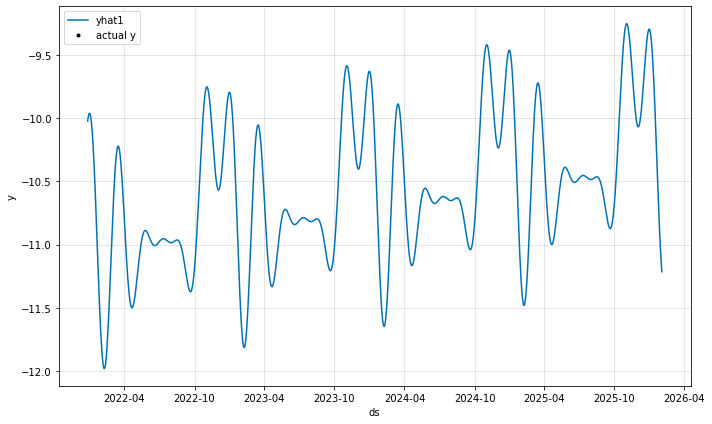

In [59]:
plot = n.plot(forecast)